# VIS Tutorial 

When starting an image-based phenotyping project it is important to consider what the end goals of the project are.
The goals of the project will determine the the camera type, imaging layout, and will help to 
guide downstream analysis. For example, if the goal of the project is to quantify the growth rates of a population of 
Arabidopsis plants, you may want to take timelapse images of whole flats of plants with an RGB (VIS) camera.

To run a VIS workflow over a single VIS image there are two required inputs:

1.  **Image:** Images can be processed regardless of what type of VIS camera was used (high-throughput platform, digital camera, cell phone camera).
Image processing will work with adjustments if images are well lit and free of background that is similar in color to plant material.  
2.  **Output directory:** If debug mode is set to 'print' output images from each step are produced.

In [1]:
ls data


08-12-17.jpg  08-22-41.jpg  output.avi  output.mp4
08-17-29.jpg  08-27-52.jpg  output.gif  output.mpeg


In [2]:
# Import Libraries 
from plantcv import plantcv as pcv
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.rcParams['animation.ffmpeg_path'] = 'ffmpeg'

import cv2
import os
import PIL
from PIL import Image 
from glob import glob
import numpy as np
%matplotlib inline

In [3]:
dir = os.path.join("data", "*.jpg")
file_list = [file for file in glob(dir)]
print(file_list)

['data/08-12-17.jpg', 'data/08-22-41.jpg', 'data/08-17-29.jpg', 'data/08-27-52.jpg']


In [109]:
import cv2
import numpy as np
import os

image_folder = 'data'
video_file = 'vid.avi'
image_size = (1600, 1200)
fps = 1

images = [img for img in os.listdir(image_folder) if img.endswith(".jpg")]
images.sort()
file_list.sort()
out = cv2.VideoWriter(video_file, cv2.VideoWriter_fourcc(*'MJPG'), fps, image_size)

img_array = []
for filename in file_list:
    img = cv2.imread(filename)
    img_array.append(img)
    out.write(img)

out.release()


In [207]:


from IPython.display import Video

#Video(‘https://archive.org/download/Sita_Sings_the_Blues/Sita_Sings_the_Blues_small.mp4’)
#Video(‘path/to/video.mp4’)
Video('output.avi', embed=True)
#Video(b’raw-videodata’, embed=True)

In [95]:
images

['08-12-17.jpg', '08-17-29.jpg', '08-22-41.jpg', '08-27-52.jpg']

[[<matplotlib.image.AxesImage object at 0x7f585d32c310>], [<matplotlib.image.AxesImage object at 0x7f585d1e5f90>], [<matplotlib.image.AxesImage object at 0x7f585d72afd0>], [<matplotlib.image.AxesImage object at 0x7f585d1f8650>]]


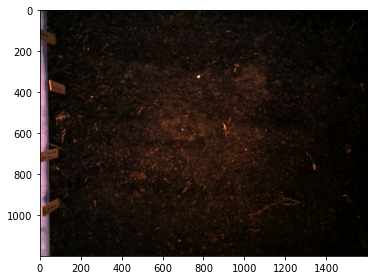

In [6]:
img_list = []
cv2_img_list= []
im_list = []
for file in file_list:
    img = Image.open(file)
    img_list.append(img)
    cv2_img = cv2.imread(file)
    cv2_img_list.append(cv2_img)
    imgplot = plt.imshow(img,animated=True)
    im_list.append([imgplot])
print(im_list)

In [7]:
im_list[0]

In [10]:

fig= plt.figure(dpi=200)

ani = animation.ArtistAnimation(fig, im_list)
writer = animation.FFMpegWriter(fps=2)
ani.save('file.gif',writer=writer)

plt.show()



<Figure size 1200x800 with 0 Axes>

In [67]:
outfile = 'output-images/' + 'base-anim.gif'
print(outfile)
img_list[0].save(outfile, save_all=True, append_images=img_list[1:], duration=2000, loop=1)


output-images/base-anim.gif


In [83]:
cv2.imshow('image',cv2_img_list)

TypeError: mat is not a numpy array, neither a scalar

In [217]:
%%HTML
<video controls>
  <source src="01.avi">
</video>

In [216]:


from IPython.display import Video

#Video(‘https://archive.org/download/Sita_Sings_the_Blues/Sita_Sings_the_Blues_small.mp4’)
#Video(‘path/to/video.mp4’)
Video('01.mp4', embed=True)
#Video(b’raw-videodata’, embed=True)

In [3]:
class options:
    def __init__(self):
        self.image = "./data/08-27-52.jpg"
        self.debug = "plot"
        self.writeimg= False
        self.result = "vis_tutorial_results.json"
        self.outdir = "." # Store the output to the current directory
        self.background = "./background/08-12-17.jpg"
# Get options
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug


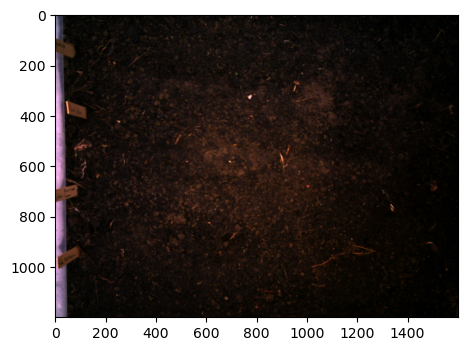

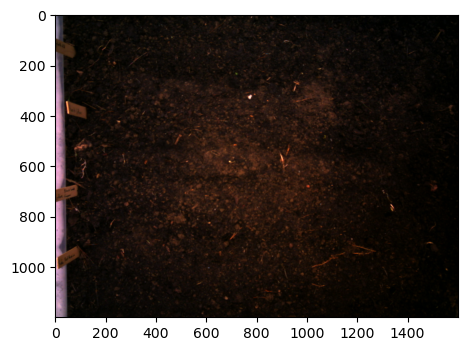

In [4]:
# Read image

# Inputs:
#   filename - Image file to be read in 
#   mode - How to read in the image; either 'native' (default), 'rgb', 'gray', or 'csv'
img, path, filename = pcv.readimage(filename=args.image)
img_b, path_b, filename_b = pcv.readimage(filename=args.background)

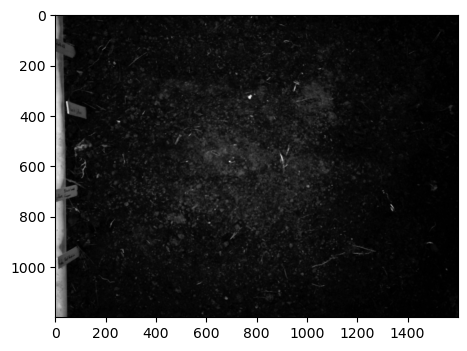

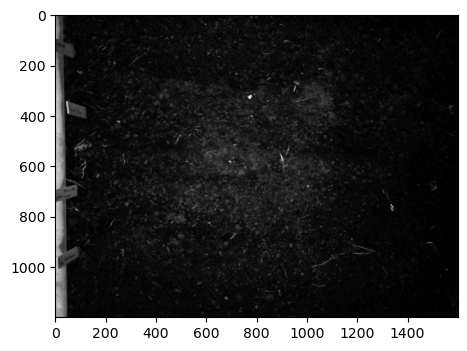

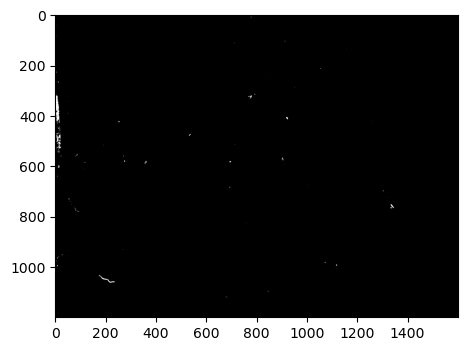

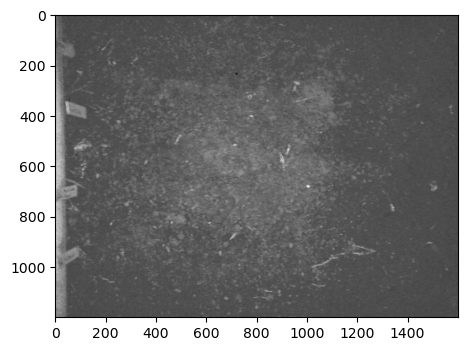

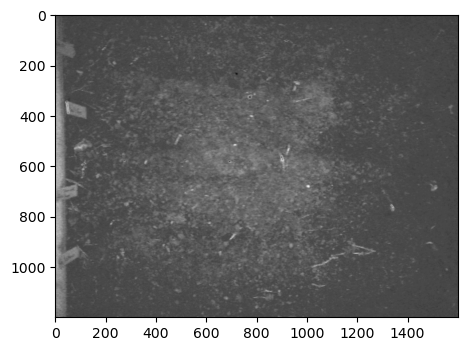

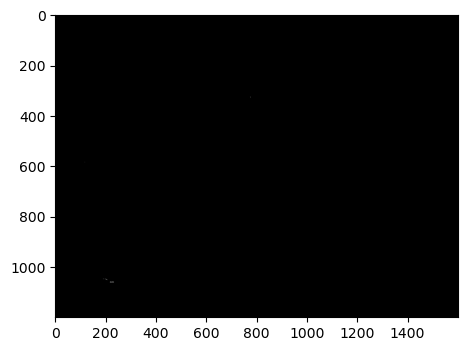

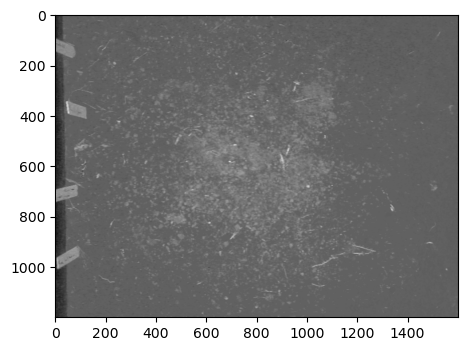

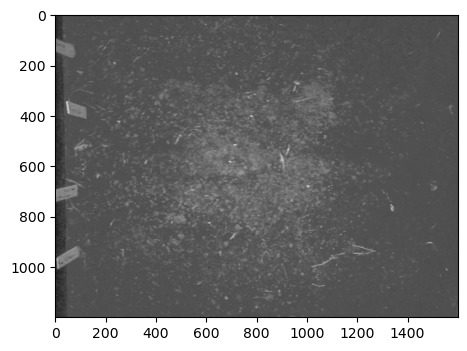

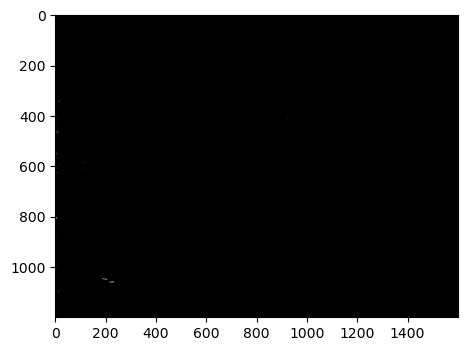

In [5]:
l = pcv.rgb2gray_lab(rgb_img=img, channel='l')
lback = pcv.rgb2gray_lab(rgb_img=img_b, channel='l')
lsub = pcv.background_subtraction(l,lback)

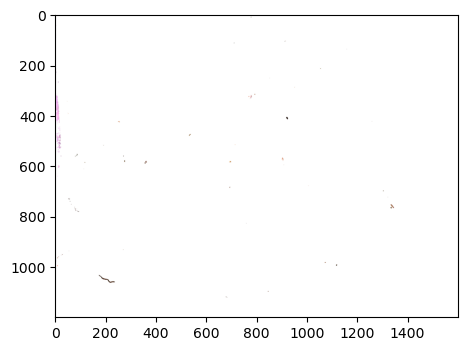

In [6]:
# Appy Mask (for VIS images, mask_color='white')

# Inputs:
#   img - RGB or grayscale image data 
#   mask - Binary mask image data 
#   mask_color - 'white' or 'black' 
masked = pcv.apply_mask(img=img, mask=lsub, mask_color='white')


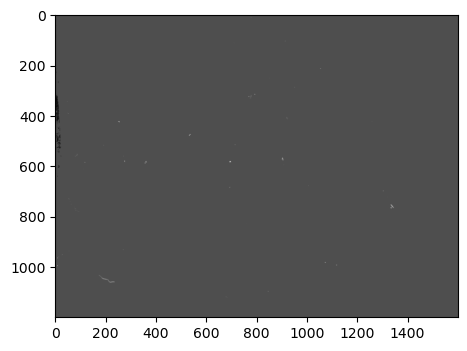

In [7]:
masked_b = pcv.rgb2gray_lab(rgb_img=masked, channel='b')

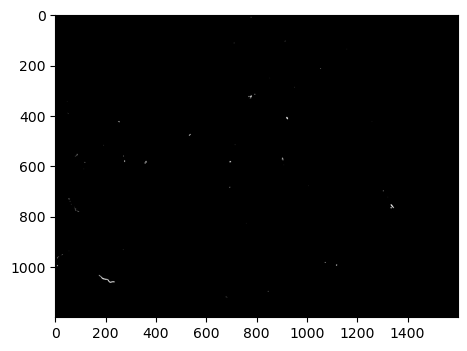

In [8]:
maskedb_thresh = pcv.threshold.binary(gray_img=masked_b, threshold=128, 
                                      max_value=255, object_type='light')


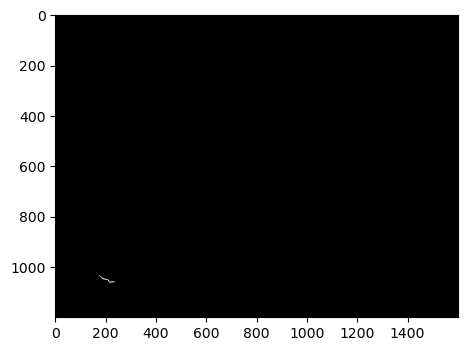

In [9]:
ab_fill = pcv.fill(bin_img=maskedb_thresh, size=150)


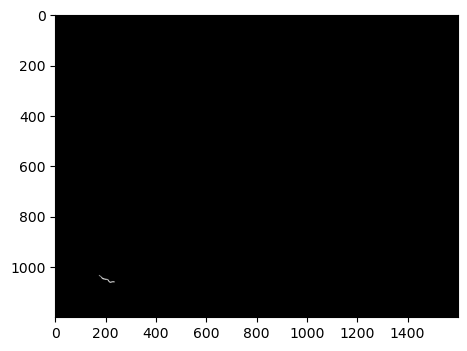

In [10]:
# Opening filters out bright noise from an image.

# Inputs:
#   gray_img - Grayscale or binary image data
#   kernel - Optional neighborhood, expressed as an array of 1's and 0's. If None (default),
#   uses cross-shaped structuring element.
opened_ab = pcv.opening(gray_img=ab_fill)

closed_ab = pcv.closing(gray_img=opened_ab)


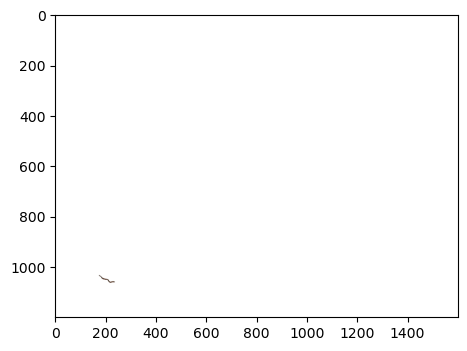

In [12]:
# Apply mask (for VIS images, mask_color=white)
masked2 = pcv.apply_mask(img=masked, mask=closed_ab, mask_color='white')


Now we need to identify the objects (also called contours) within the image 

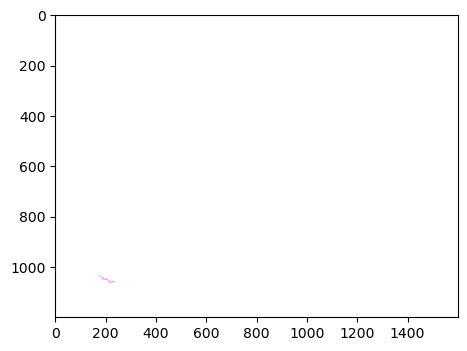

In [13]:
# Identify objects

# Inputs: 
#   img - RGB or grayscale image data for plotting 
#   mask - Binary mask used for detecting contours 
id_objects, obj_hierarchy = pcv.find_objects(img=masked2, mask=ab_fill)


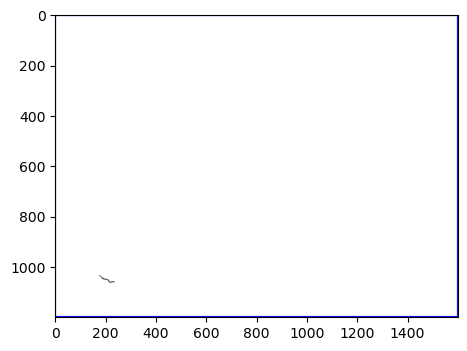

In [14]:
# Define the region of interest (ROI) 

# Inputs: 
#   img - RGB or grayscale image to plot the ROI on 
#   x - The x-coordinate of the upper left corner of the rectangle 
#   y - The y-coordinate of the upper left corner of the rectangle 
#   h - The height of the rectangle 
#   w - The width of the rectangle 
roi1, roi_hierarchy= pcv.roi.rectangle(img=masked2, x=0, y=0, h=1200, w=1600)

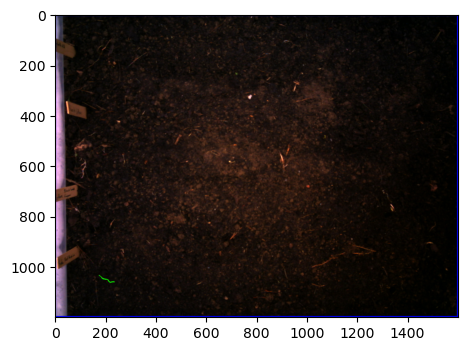

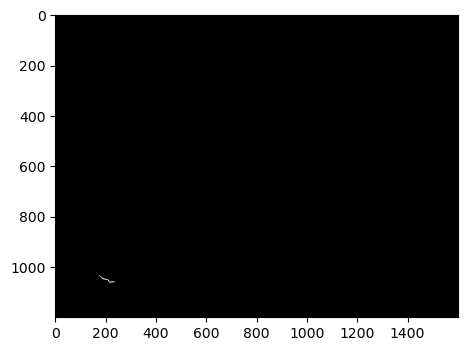

In [15]:
# Decide which objects to keep

# Inputs:
#    img            = img to display kept objects
#    roi_contour    = contour of roi, output from any ROI function
#    roi_hierarchy  = contour of roi, output from any ROI function
#    object_contour = contours of objects, output from pcv.find_objects function
#    obj_hierarchy  = hierarchy of objects, output from pcv.find_objects function
#    roi_type       = 'partial' (default, for partially inside the ROI), 'cutto', or 
#                     'largest' (keep only largest contour)
roi_objects, hierarchy3, kept_mask, obj_area = pcv.roi_objects(img=img, roi_contour=roi1, 
                                                               roi_hierarchy=roi_hierarchy, 
                                                               object_contour=id_objects, 
                                                               obj_hierarchy=obj_hierarchy,
                                                               roi_type='partial')


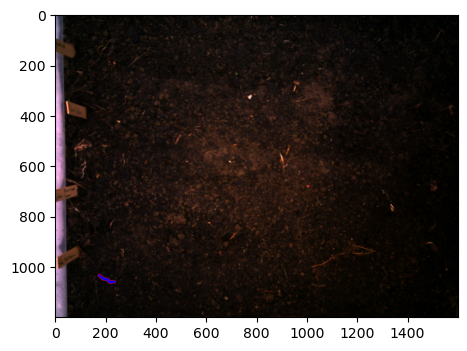

In [48]:
# Object combine kept objects

# Inputs:
#   img - RGB or grayscale image data for plotting 
#   contours - Contour list 
#   hierarchy - Contour hierarchy array 
obj, mask = pcv.object_composition(img=img, contours=roi_objects, hierarchy=hierarchy3)


In [101]:
output  = cv2.drawContours(img, obj, -1,(0,0,255),thickness=4 )


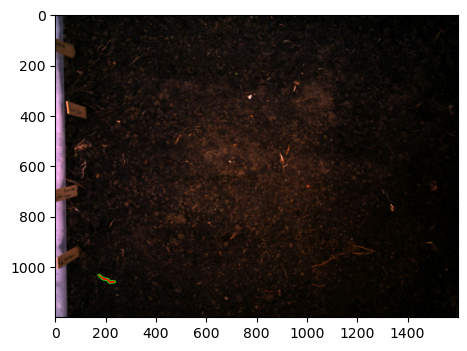

In [102]:
pcv.plot_image(output)

In [103]:
#save img plus object contour?
pcv.print_image(output, "./output.jpg")